<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformation**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Create Example Data: (Gaussian) White Noise**

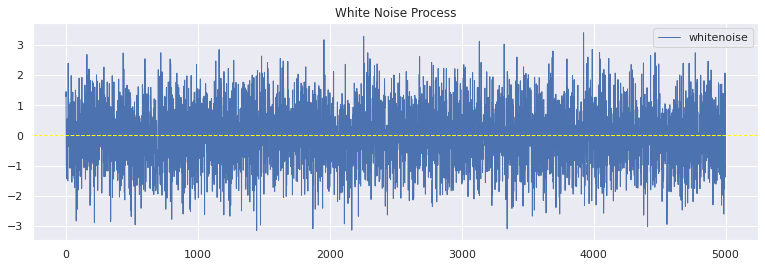

In [0]:
from random import gauss
from random import seed
from pandas import Series

# Set seed for reproducibility and hyperparameter
seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')

# Visualize
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
whitenoise.plot(title='White Noise Process')
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

* Following transformations are possible to make a time series stationary
* Differencing is appied for stochastic / difference stationary processes
* Log, square root etc can be applied on deterministic trends
* After each transformation you can look at the distribution plot, QQ plot, autocorrelation plot and conduct normal distribution test, Augmented Dickey Fuller & KPSS test, to check if there is still a signal left.
* Of course a transformation of white noise processes will not change that there is no predictable pattern. This part is purely for completeness applicable at non-white noise processes.

## **Difference**

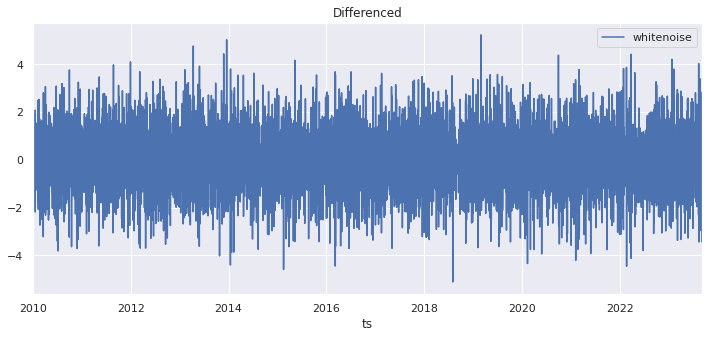

In [0]:
# Differenced
differenced = series - series.shift(1)
differenced.plot(title='Differenced')

## **Percentage Difference**

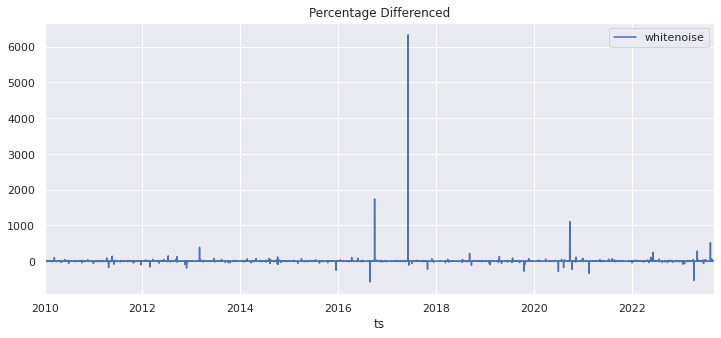

In [0]:
# Percentage Differenced
percentage = series / series.shift(1) -1
percentage.plot(title='Percentage Differenced')

## **Log Return**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


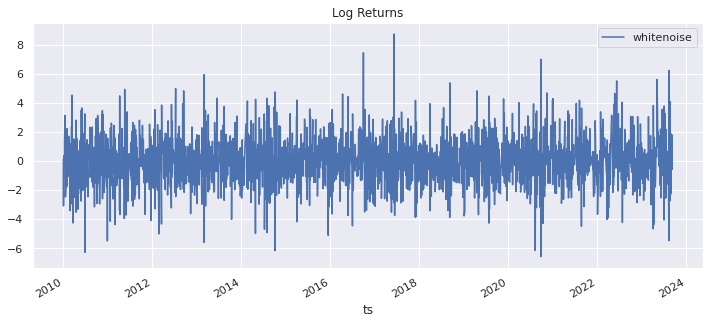

In [0]:
# Log Return
lr = np.log(series/series.shift(1)).dropna()
lr.plot(title='Log Returns')

## **Square Root**

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


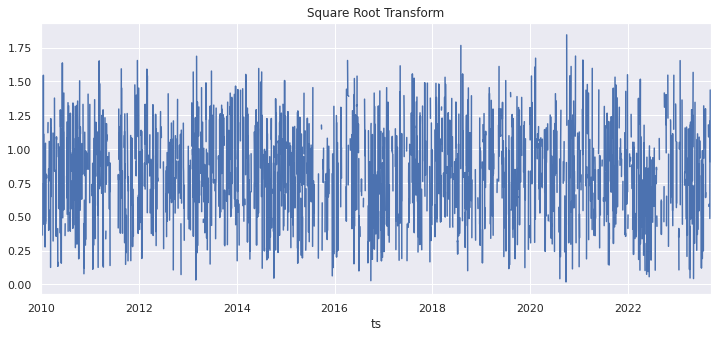

In [0]:
# Square Root Transform
sr = np.sqrt(series.whitenoise)
sr.plot(title='Square Root Transform')

## **First Derivative**

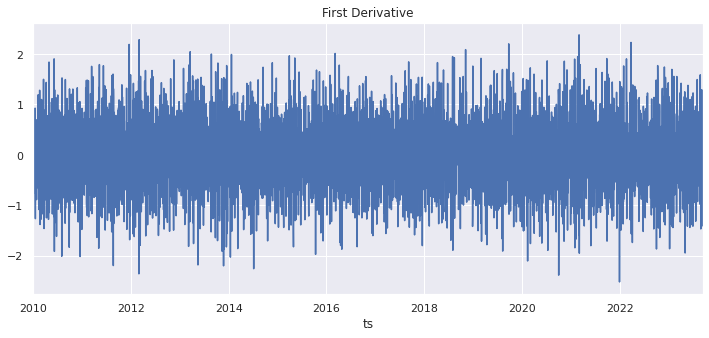

In [0]:
# First Derivative
fd = pd.Series(np.gradient(series.whitenoise), series.whitenoise.index, name='slope')
fd.plot(title='First Derivative')